# Прогноз оттока посетителей фитнес-клуба "Культурист-датасаентист"

**Цель проекта**- провести анализ и подготовить план действий по удержанию клиентов

**Задачи проекта**:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами (выделить целевые группы клиентов, предложить меры по снижению оттока, определить другие особенности взаимодействия с клиентами).

## Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np  
from numpy import nan as NaN
import warnings
import warnings
warnings.filterwarnings("ignore")
import math as mth
from scipy import stats as st
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns 
import matplotlib.pyplot as plt  
from matplotlib import rcParams 
import matplotlib.gridspec as gridspec
from datetime import date, datetime, timedelta  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)



In [3]:
#задаем функцию для описания датафрейма
def info_data(data_frame):
    print('Информация о колонках\n')
    data_frame.info() 
    
    print('________________________________________________________________________________________________')
    
    print('\nПервые 5 строк')
    display(data_frame.head())
    
    print('________________________________________________________________________________________________')
    
    print('\nКоличество дубликатов в колонках')
    display(data_frame.duplicated().sum())
    
    print('________________________________________________________________________________________________')
    
    print('Описание данных')
    display(data_frame.describe().transpose())
    
    return

In [4]:
data = pd.read_csv('/datasets/gym_churn.csv')

## EDA

In [5]:
info_data(data)

Информация о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total        

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


________________________________________________________________________________________________

Количество дубликатов в колонках


0

________________________________________________________________________________________________
Описание данных


,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Near_Location,4000.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
Partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Promo_friends,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
Phone,4000.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
Contract_period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
Group_visits,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
Avg_additional_charges_total,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
Month_to_end_contract,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Датасет сформирован корректно: пропуски и дубликаты отсутствуют. Несколько столбцов датафрейма содержат бинарные данные со значениями 1-0. Судя по их среднему и стандартному отклонению, можно заключить следующее:
- по гендерному признаку клиенты поделены на приблизительно равные половины;
- большинство клиентов зала проживают поблизости;
- половина занимается по партнерской программе;
- меньшая часть клиентов привлечена про промокоду друга;
- в среднем 40 процентов посещают групповые программы;
- средний возраст посещающих спортзал = 29 лет (плюс-минус 3 года);
- лайфтайм клиента - около 4 месяцев(!);
- в среднем, посетители спортзала совершают 2 тренировки в неделю, а максимальное зафиксированное количество посещенных тренировок в неделю - 6!
- в среднем 27 процентов клиентов утекло по данным предыдущего месяца.

Из предобработки ограничимся только приведением названий столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()

**Посмотрим на средние значения в разрезе двух групп пользователей: ушедших(1) и оставшихся(0):**

In [7]:
churn_grouped_data = data.groupby('churn').mean().transpose()
churn_grouped_data.columns = ['продолжающие', 'ушедшие']
churn_grouped_data

,продолжающие,ушедшие
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


**Главные отличия ушедших пользователей**:
- среди них меньше тех, кто пользуется партнерской программой, промокодом друзей и любителей групповых занятий (логично, что заниматься с единомышленниками веселее, а также создает дополнительную мотивацию не пропускать);
- они занимаются в среднем чуть меньше месяца (есть гипотеза, что клиенты, чьей целью является похудение, могут испугаться привеса за счет роста мышечной массы как раз после месяца тренировок и забросить спорт);
- они в среднем на три года моложе;
- среди них больше тех, кто покупает абонемент на месяц;
- в месяц, предшествующий, оттоку, они совершают в среднем только 1 тренировку в неделю.

**Столбчатые гистограммы и распределения признаков**

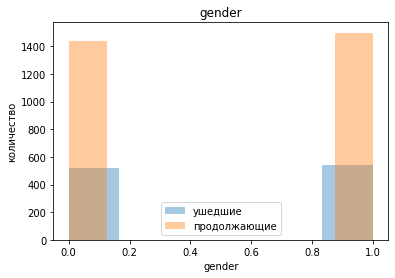

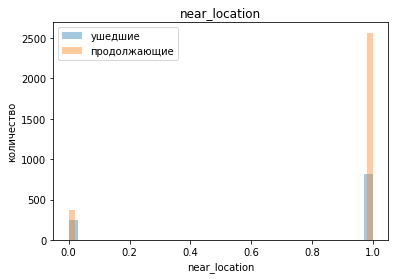

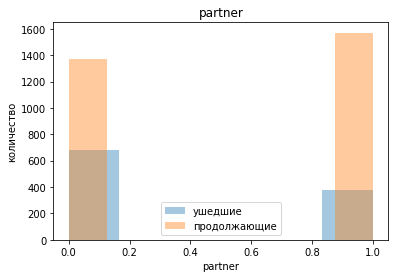

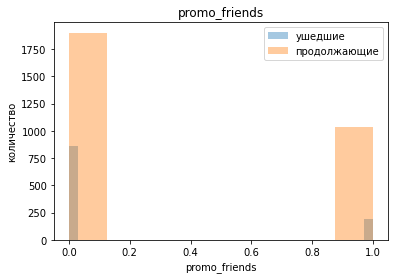

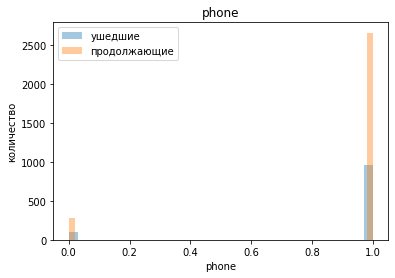

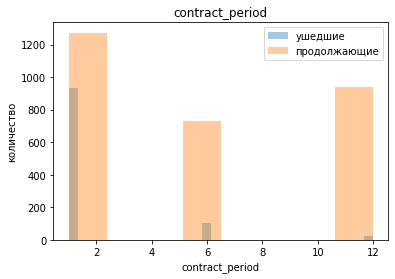

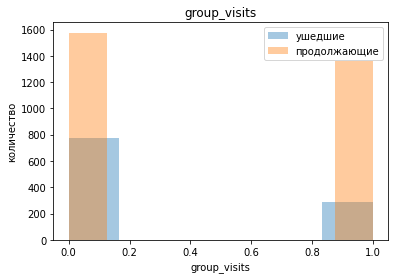

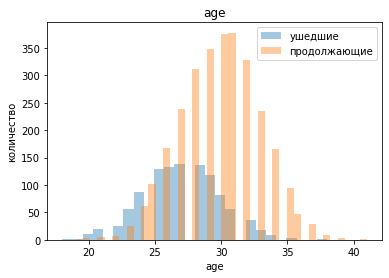

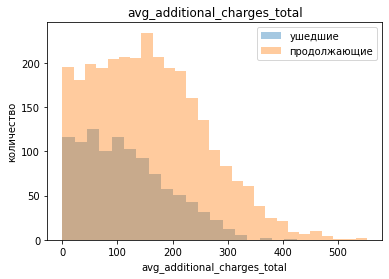

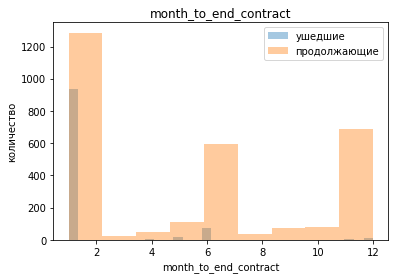

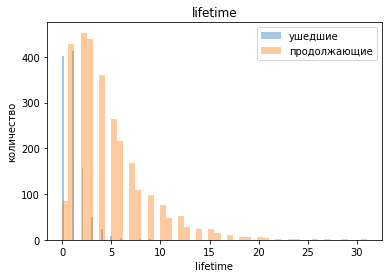

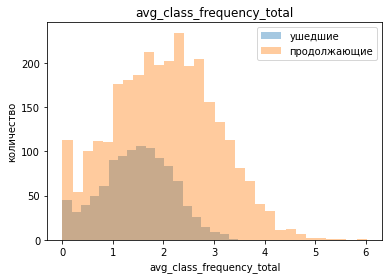

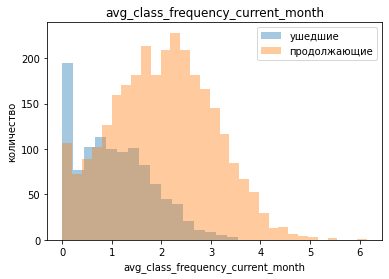

In [8]:
churn_clients = data.query('churn == 1')
not_churn_clients = data.query('churn == 0')
fig, ax = plt.subplots()
for column in data.drop('churn', axis = 1).columns:
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('количество')
    sns.distplot(churn_clients[column], label='ушедшие', kde=False)
    sns.distplot(not_churn_clients[column], label='продолжающие', kde=False)
    plt.legend()
    plt.show()

Что явно видно на графиках:
- разница между ушедшими и оставшимися клиентами чувствует на таких признаках как 'partner' и 'promo-friends', 'Group_visits', 'Avg_additional_charges_total'. Выше показатели у оставшихся.
- пользователи, которые забросили занятия, редко покупали абонементы длительностью год. Чаще -всего на 1 месяц;
- Распределение по возрасту ушедших смещено влево, то есть они, действительно, помоложе (как это было видно на средних показателях);
- Распределение по количеству посещений в неделю у ушедших также смещено ближе к 0.

**Построим тепловую карту корреляции**

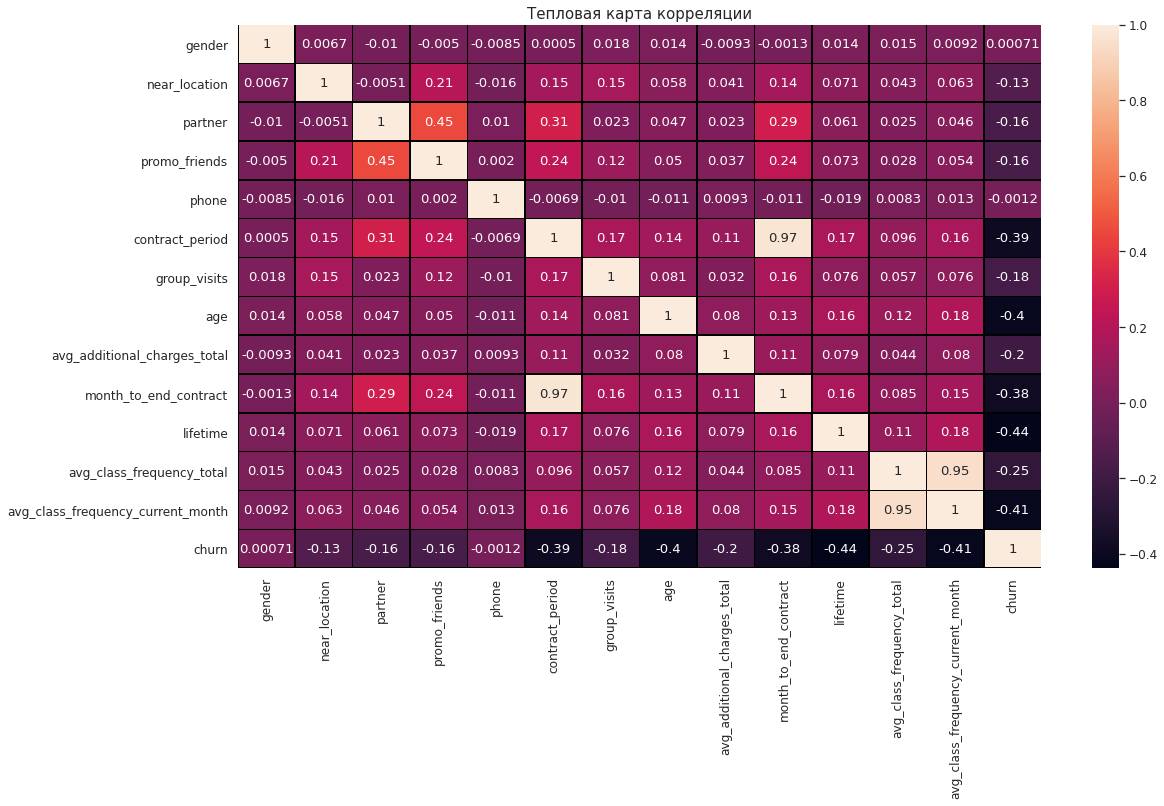

In [9]:
sns.set(font_scale=1.1)
corr_m = data.corr()# напишите ваш код здесь
plt.figure(figsize = (18, 10))
sns.heatmap(corr_m,  annot = True, fmt='.2g', linewidths=.5, linecolor='black')
plt.title('Тепловая карта корреляции', fontsize = 15) 
plt.show()

Тепловая корреляционная карта показала, что среди признаков есть мультикоррелирующие : срок до истечения контракта и срок, на который заключен контракт(в датасете, скорее всего, много посетителей,недавно оформивших контракт), средняя частота посещений в неделю за все время с начала действия абонемента  и  средняя частота посещений в неделю за предыдущий месяц (большинство людей посещают тренировки в одном заданном темпе). Практически нулевая корреляция по признаку наличия телефона клиента. Этот столбец и мультиколлинеарные признаки удаляем из датасета: 

In [10]:
data = data.drop(['month_to_end_contract', 'avg_class_frequency_total', 'phone'], axis=1)

### Выводы:

По итогам исследовательского анализа складывается портрет пользователя, который может покинуть фитнес-клуб:
- Не является участником партнерской программы;
- Не был приглашен другом;
- Мало или совсем не посещает групповые занятия;
- Мало тратит на доп услуги или не тратит вообще;
- Чаще всего берет абонемент только на месяц;
- Тренируется в среднем только раз в неделю;
- Средний возраст - 27 лет.

## Построение модели прогнозирования оттока клиентов

### Разбивка данных на обучающую и валидационную выборку функцией train_test_split()

In [11]:
#создание двух матриц: признаков и валидационной переменной:
X = data.drop('churn', axis=1)
y = data['churn']
#разделение модели на обучающую и валидационную выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# создание объекта класса StandardScaler и применение его к обучающей выборке:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучение модели на train-выборке с помощью метода логистической регрессии и случайного леса:

In [12]:
#задаем функцию, в аргументах которой будет модель и наши выборки
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('\tF1: {:.2f}'.format(f1_score(y_test, predictions)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

In [13]:
#задаем нужные модели:
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

In [14]:
#циклом выводим метрики для двух моделей:
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.96
RandomForestClassifier(random_state=0)
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.77
	F1: 0.79
	ROC_AUC: 0.95


Модель логистической регрессии "выигрывает" у модели случайного леса по всем метрикам, кроме метрики точности (доля правильных ответов только среди целевого класса). Но по полноте выигрывает на несколько десятых. То есть модель логистической регрессии лучше прогнозирует, кто "Не уйдет". Их сводная метрика - F1 учитывает баланс между точностью и полнотой, поэтому на основании метрик лучше себя показала модель ЛР.

### Вывод:

Модель логистической регрессии показала себя лучше на основании метрик по сравнению в моделью случайного леса.

## Кластеризация клиентов

### Стандартизация, иерархическая кластеризация и кластеризации на основании алгоритма K-Means

In [15]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 

**Дендрограмма**

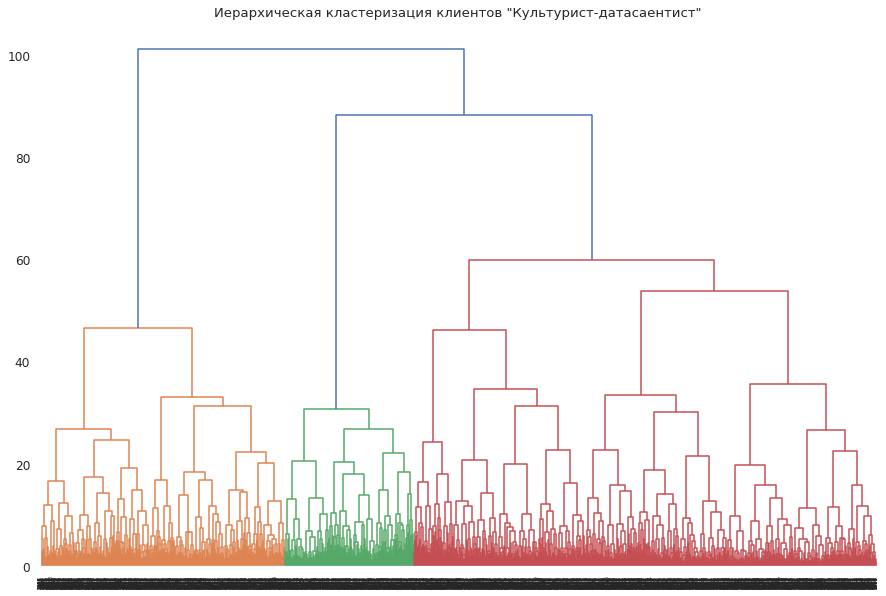

In [16]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов "Культурист-датасаентист"')
plt.show() 

На дендрограмме можно выделить 4 кластера (с натяжкой 5)

**K-means**

In [17]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels

In [18]:
display(data.groupby('cluster_km').mean())

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,
0,0.49,1.00,0.93,1.00,7.08,0.52,29.55,152.24,4.07,1.90,0.13
1,1.00,1.00,0.21,0.08,2.27,0.34,28.40,130.69,2.41,1.52,0.42
2,0.50,0.00,0.49,0.07,2.96,0.23,28.69,136.93,2.95,1.60,0.40
3,0.00,1.00,0.21,0.07,2.43,0.34,28.63,129.41,2.52,1.46,0.40
4,0.54,0.99,0.48,0.04,8.12,0.59,30.65,187.70,6.87,2.37,0.01


Из 5 в трех кластерах (2,3 и 4 по счету сверху) примерно одинаковое среднее значение по ушедшим клиентам. В них всех более низкте показатели Avg_class_frequency_current_month (посещаемость в пред. месяц), средний лайфтайм в среднем диапазоне 2.6, примерно на одном уровне сумма затрат на доп услуги, и сильно меньше, чем в двух других кластерах, ниже длительность приобретенного абонемента, ниже количество участников акции "приведи друга" (но в 5 кластере показатель тоже низкий), в двух из 3 кластеров с высоким оттоком меньше среднее количество участников партнерских программ. 

#### Вывод: 

### Распределения признаков для кластеров

Кластеризация дала практически аналогичные выводы, что и EDA за исключением критерия оттока по возрасту. Это не такой ключевой фактор как: участие в  партнерской программе,  приглашение другом, активность посещения групповых занятий, траты на доп услуги,
продолжительность срока действия абонемента и частота тренировок.

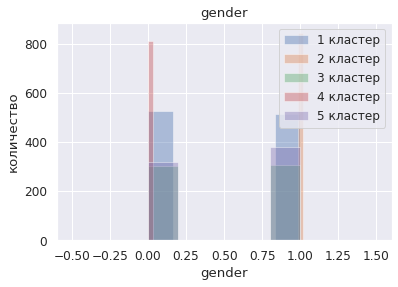

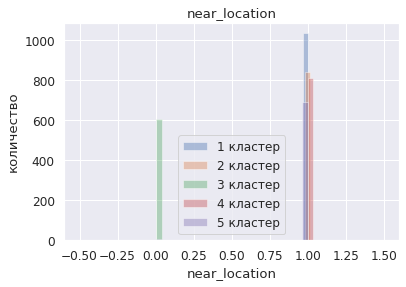

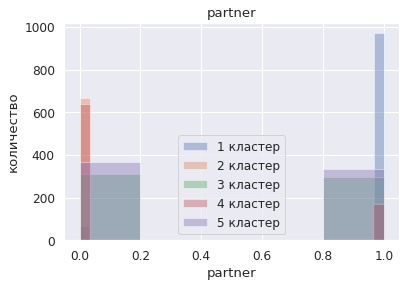

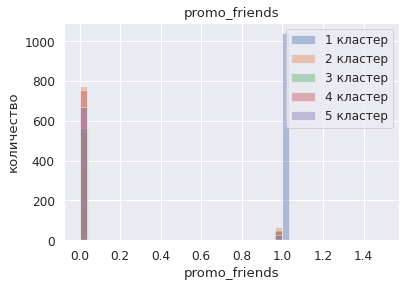

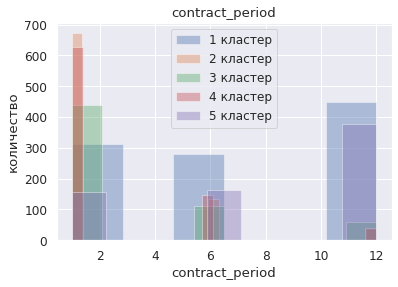

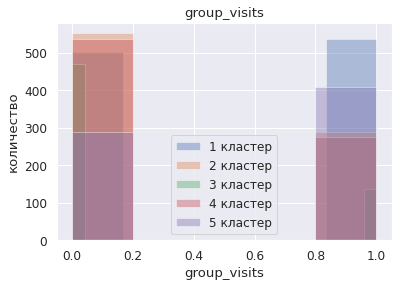

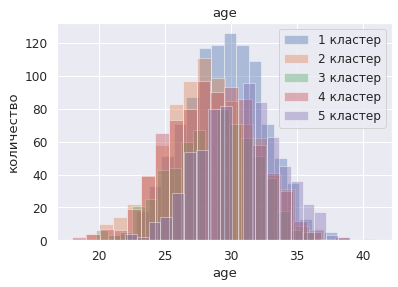

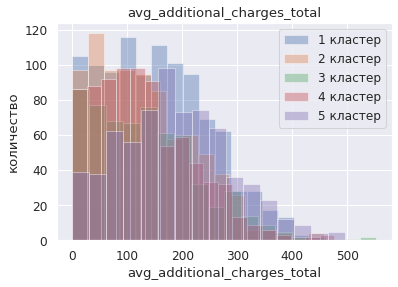

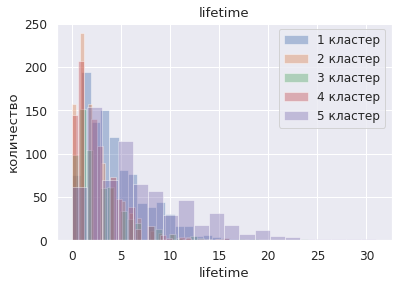

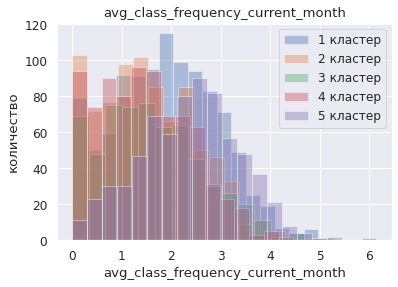

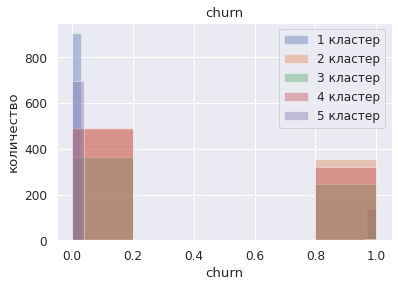

In [19]:
zero_cluster_clients = data.query('cluster_km == 0')
one_cluster_clients = data.query('cluster_km == 1')
two_cluster_clients = data.query('cluster_km == 2')
three_cluster_clients = data.query('cluster_km == 3')
four_cluster_clients = data.query('cluster_km == 4')
fig, ax = plt.subplots()
for column in data.drop('cluster_km', axis = 1).columns:
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('количество')
    sns.distplot(zero_cluster_clients[column], label='1 кластер', kde=False)
    sns.distplot(one_cluster_clients[column], label='2 кластер', kde=False)
    sns.distplot(two_cluster_clients[column], label='3 кластер', kde=False)
    sns.distplot(three_cluster_clients[column], label='4 кластер', kde=False)
    sns.distplot(four_cluster_clients[column], label='5 кластер', kde=False)
    plt.legend()
    plt.show()

Графики внесли ясность насчет принципов выделения кластеров. Например, 4 и 2 классы - представители противоположных полов. 3 кластер - это те, кто живет неблизко к клубу. 1 кластер - только участники бонусных программ.  Наблюдая за кластерами 2,3,4, которые наиболее подвержены оттоку(1,2 и 3 индексы), можно проследить признаки, в которых 3 кластера группируются рядом  - это:
- проживание в районе клуба (значит, признак не влияет на отток и , скорее всего, люди занимаются поближе к работе, а не дому);
- привлечение другом (при обилии рекламы и информации, сегодня клиенты склонны доверять больше рекомендациям знакомых или блоггеров, которые тоже могут дарить промокоды);
- длительность абонемента (2,3 и 4 кластеры представлены больше в одномесячном варианте);
- лайфтайм - ожидаемый признак, так как подверженые оттоку покупают абонемент на месяц активнее всего;
- удивило, что нельзя четко сказать, что они мало тратят на допуслуги;
- их частота тренировок в неделю явно уступает тем, кто с фитнесом идет рука об руку.

### Доля оттока

In [20]:
data.groupby('cluster_km').agg({'churn': 'mean'}).sort_values(by='churn', ascending = False)

,churn
cluster_km,
1,0.42
2,0.40
3,0.40
0,0.13
4,0.01


Что и требовалось доказать, самые подверженные оттоку кластеры - это с индексами 1,2 и 3 (на графиках - 2, 3 и 4)

## Рекомендуемая маркетинговая стратегия сети "Культурист-датасаентист"

- Сделать акцент на b2b проекты с крупными компаниями, имеющими офисы вблизи клубов. Возможность посещать фитнес в будние дни, когда там не много людей, до или во время работы, еще и по льготной цене - очень привлекательно;
- Блогосфера! Сотрудничать с блоггерами разных возрастных категорий, которые будут раздавать промокоды;
- Популяризировать совместное посещении фитнеса людьми, имеющими социальную звязь или помочь людям создавать эти связи на групповых занятиях. Вместе всегда веселее, вместе захочется сходить в кафе попить смузи и тд. От увеличения объема продаж доп услуг увеличится выручка.